In [1]:
# "We started by loading the dataset train.csv, which consists of ___ rows and ___ columns.

In [2]:
# install import libaries
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
import scipy.stats as stats

In [22]:
from ydata_profiling import ProfileReport

In [3]:
df=pd.read_csv('train.csv')
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [4]:
df.shape

(891, 12)

# there are total 891 row and 12 columns 

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# in this we can seen we have lot's of null value in age(177) and cabin (687) and also Embarked (2)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

# in this we can seen many columns have outliers and also need to adjust null values


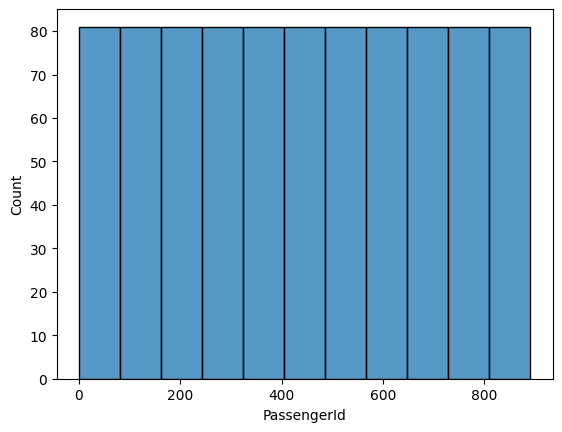

In [8]:
# Create the histogram
sns.histplot(x=df['PassengerId'],data=df)
plt.show()

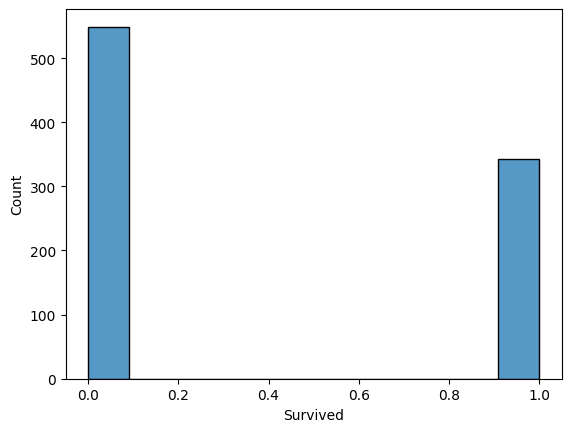

In [9]:
# Create the histogram
sns.histplot(x=df['Survived'],data=df)
plt.show()

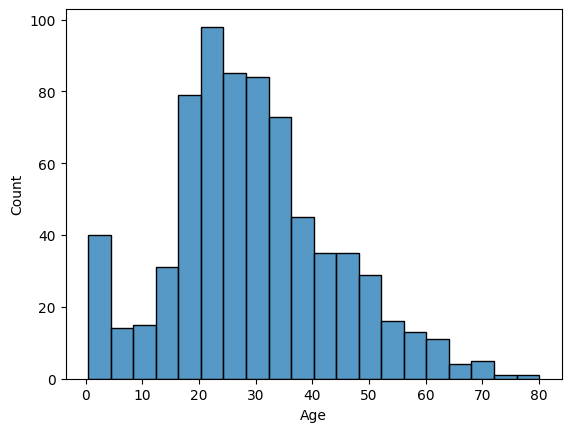

In [10]:
# Create the histogram
sns.histplot(x=df['Age'],data=df)
plt.show()

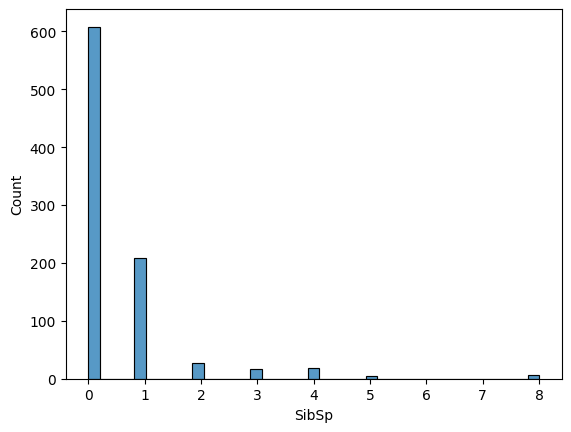

In [11]:
# Create the histogram
sns.histplot(x=df['SibSp'],data=df)
plt.show()

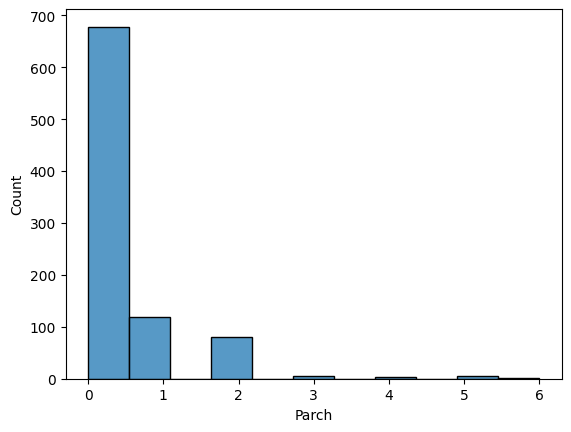

In [12]:
# Create the histogram
sns.histplot(x=df['Parch'],data=df)
plt.show()

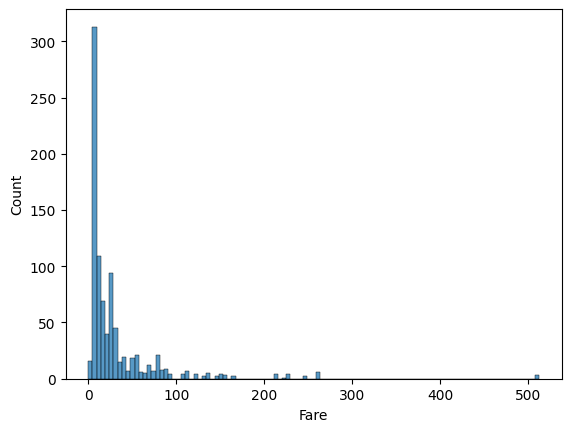

In [13]:
# Create the histogram
sns.histplot(x=df['Fare'],data=df)
plt.show()

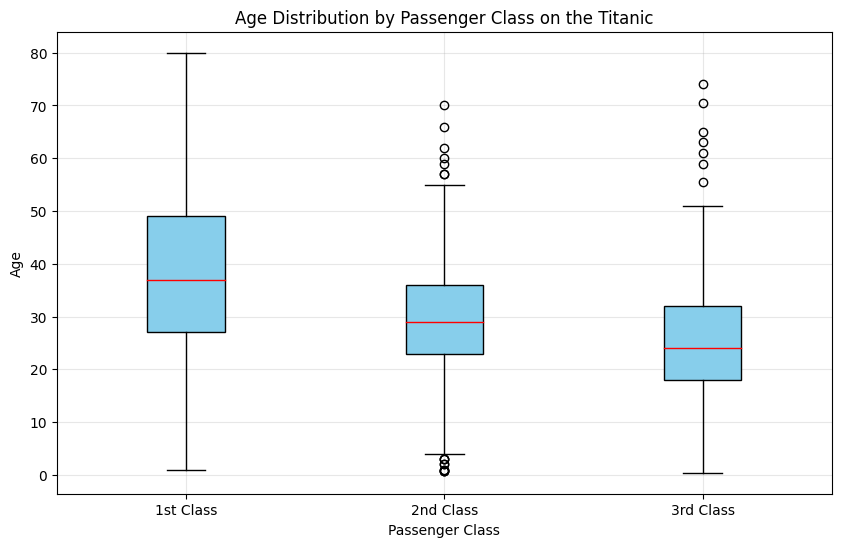

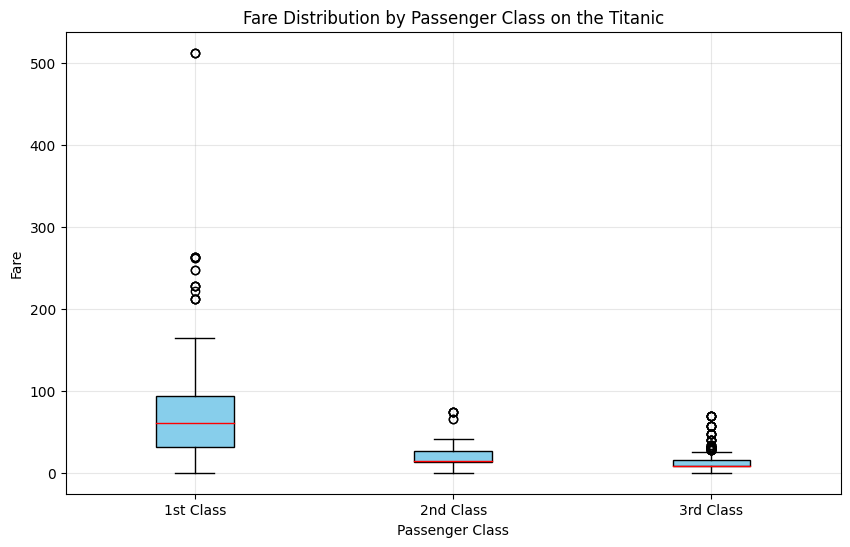

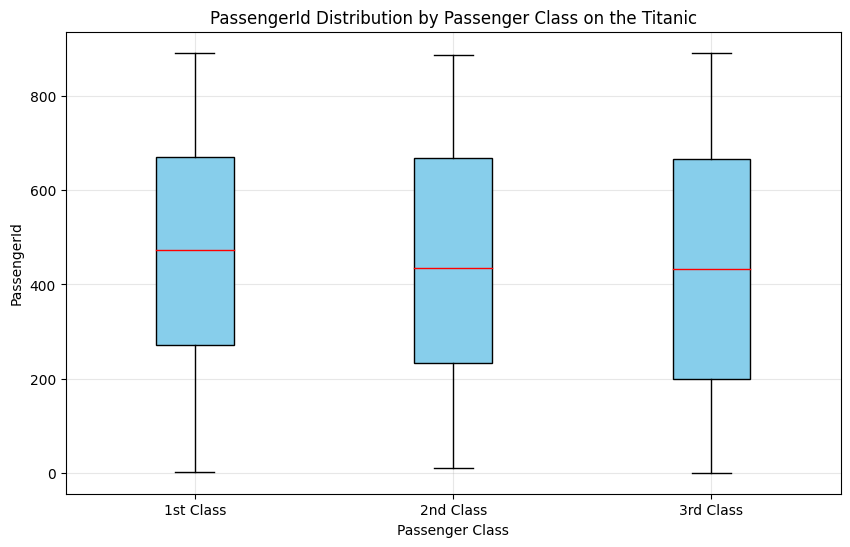

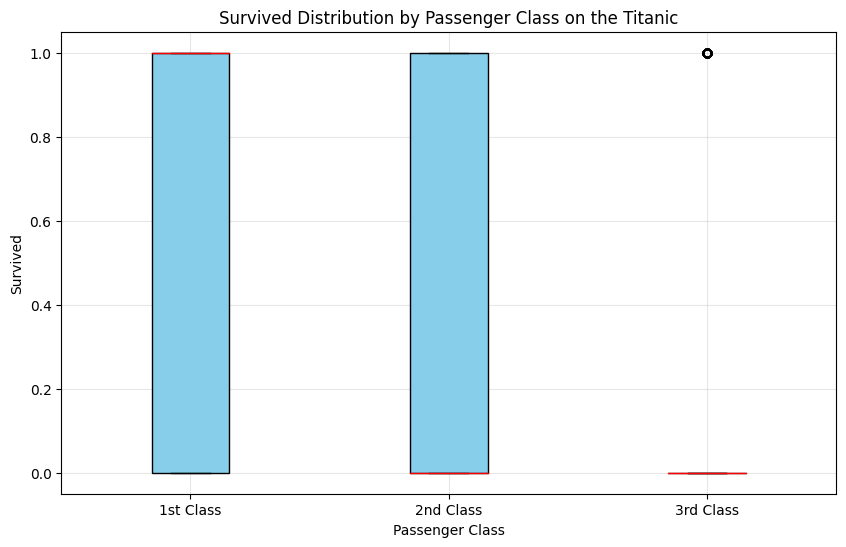

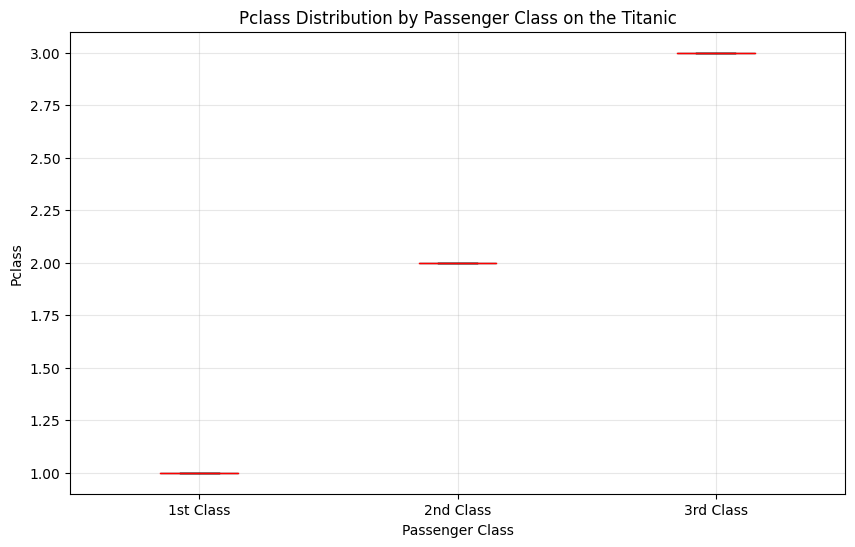

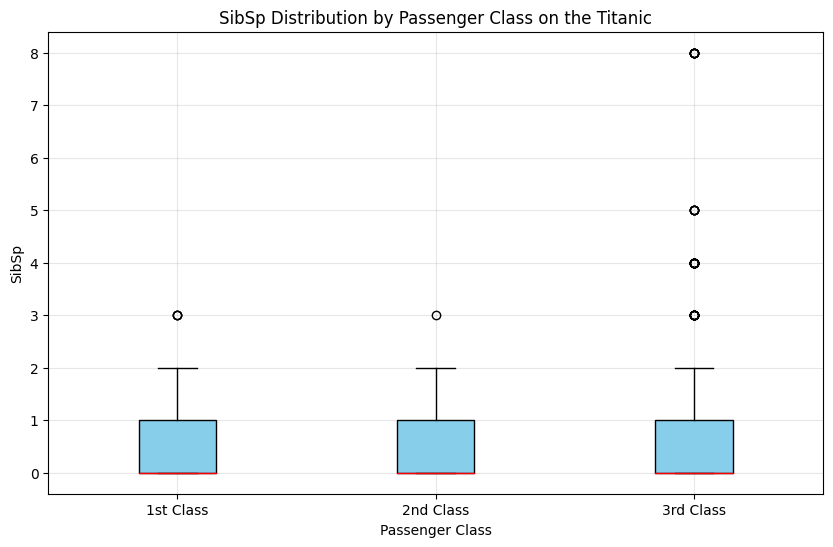

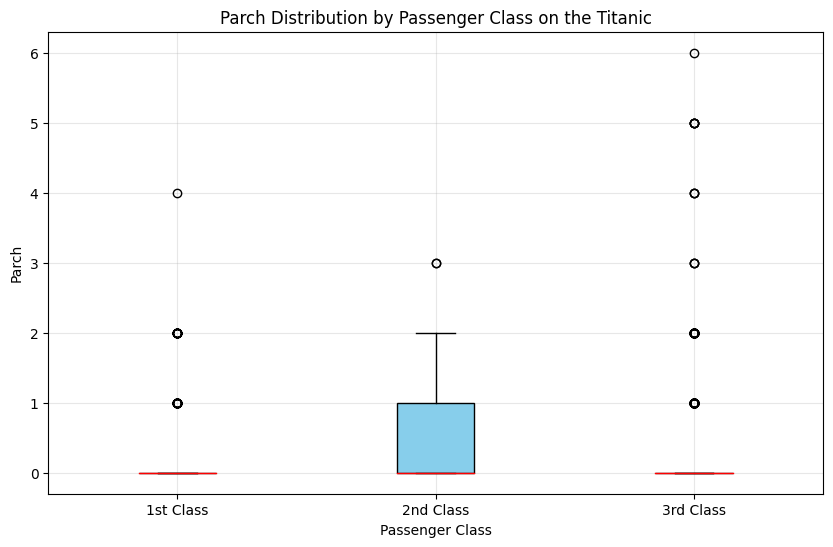

In [14]:

import io


# Select numerical columns for box plots (Age and Fare are the primary continuous variables)
numerical_columns = ['Age', 'Fare','PassengerId','Survived','Pclass','SibSp','Parch']

# Loop through each numerical column to create a box plot grouped by Pclass
for column in numerical_columns:
    # Filter out missing values for the current column
    filtered_data = df.dropna(subset=[column])
    
    # Create a list of data for each Pclass
    data_by_pclass = [filtered_data[filtered_data['Pclass'] == i][column] for i in [1, 2, 3]]
    
    # Create the box plot
    plt.figure(figsize=(10, 6))
    plt.boxplot(data_by_pclass, labels=['1st Class', '2nd Class', '3rd Class'], patch_artist=True, 
                boxprops=dict(facecolor='skyblue', edgecolor='black'),
                medianprops=dict(color='red'))
    plt.title(f'{column} Distribution by Passenger Class on the Titanic')
    plt.xlabel('Passenger Class')
    plt.ylabel(column)
    plt.grid(True, alpha=0.3)
    
    # Save the plot with a unique filename
    plt.savefig(f'titanic_{column.lower()}_by_pclass_boxplot.png')
    plt.show()
    plt.close()  # Close the figure to free memory

In [15]:
# Fill missing Age values with the median
df['Age'] = df['Age'].fillna(df['Age'].median())

In [20]:
# Fill missing Cabin values with the mode (using mode()[0] to get a scalar)
df['Cabin'] = df['Cabin'].fillna(df['Cabin'].mode()[0])

In [21]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [24]:
profile=ProfileReport(df)
profile.to_file('titaic.html')
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 26.96it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

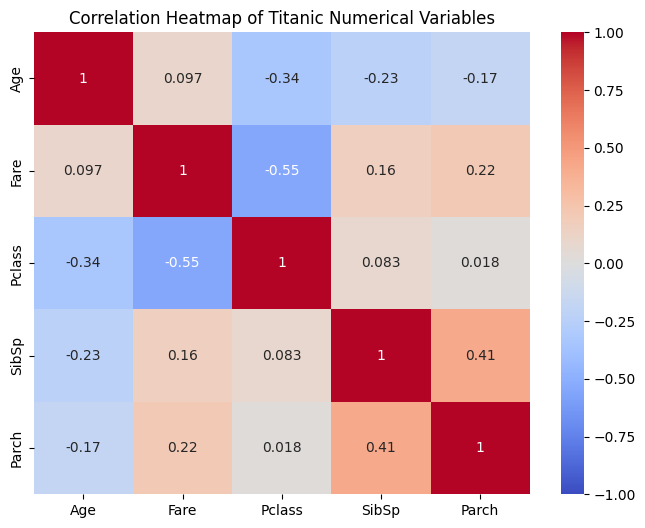

In [26]:
# Compute correlation matrix for numerical columns
corr = df[['Age', 'Fare', 'Pclass', 'SibSp', 'Parch']].corr()

# Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Titanic Numerical Variables')
plt.savefig('titanic_correlation_heatmap.png')
plt.show()

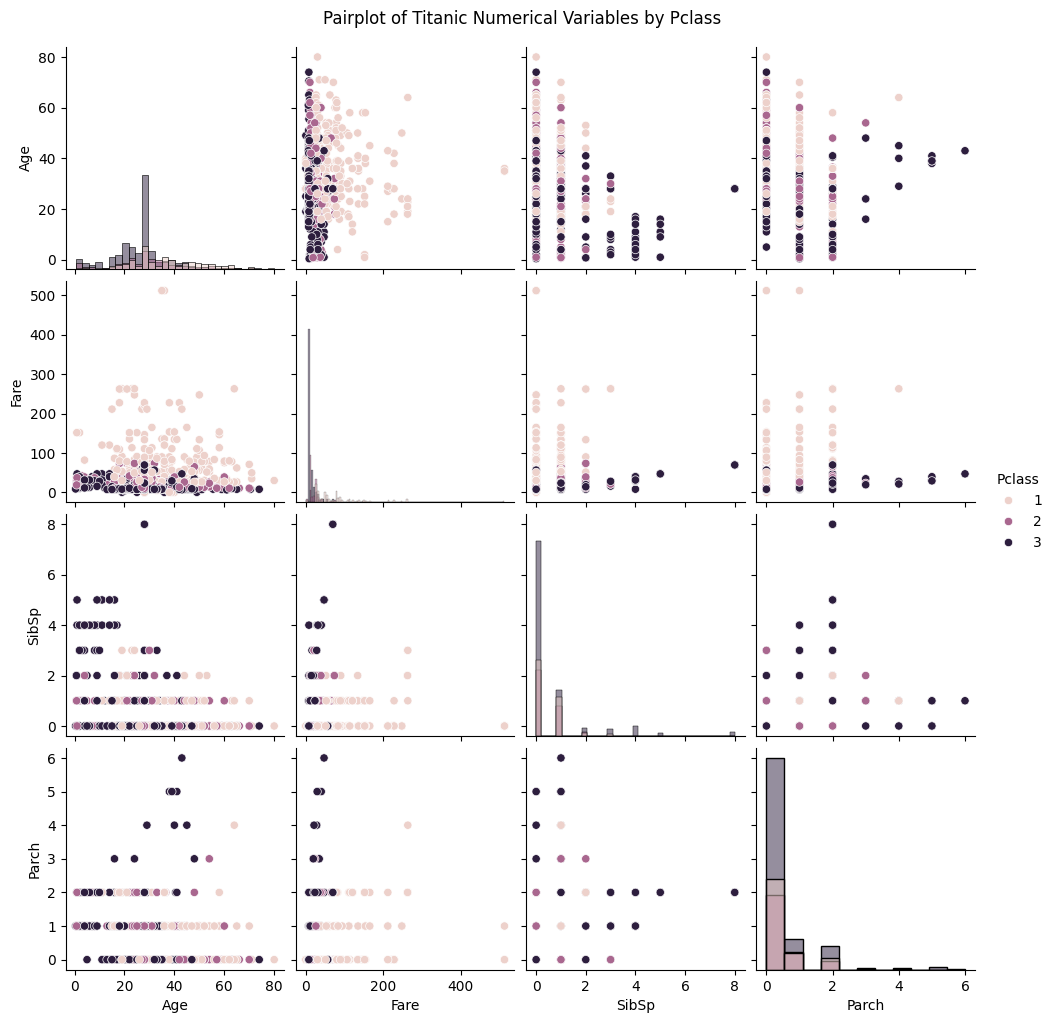

In [27]:
# Create pairplot for numerical columns, colored by Pclass
sns.pairplot(df, vars=['Age', 'Fare', 'SibSp', 'Parch'], hue='Pclass', diag_kind='hist')
plt.suptitle('Pairplot of Titanic Numerical Variables by Pclass', y=1.02)
plt.savefig('titanic_pairplot.png')
plt.show()

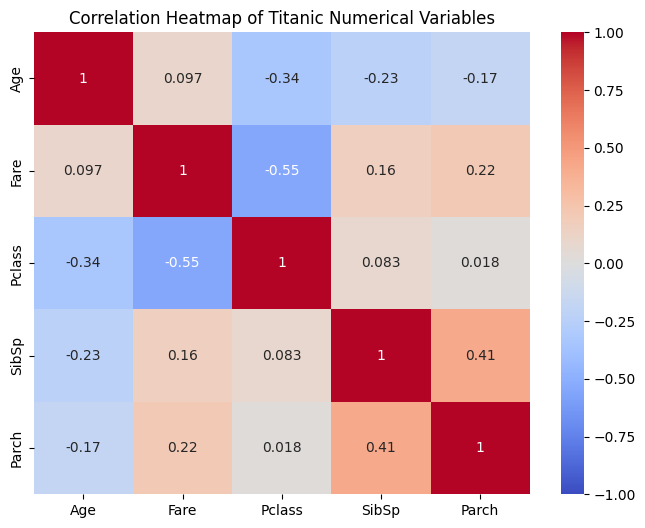

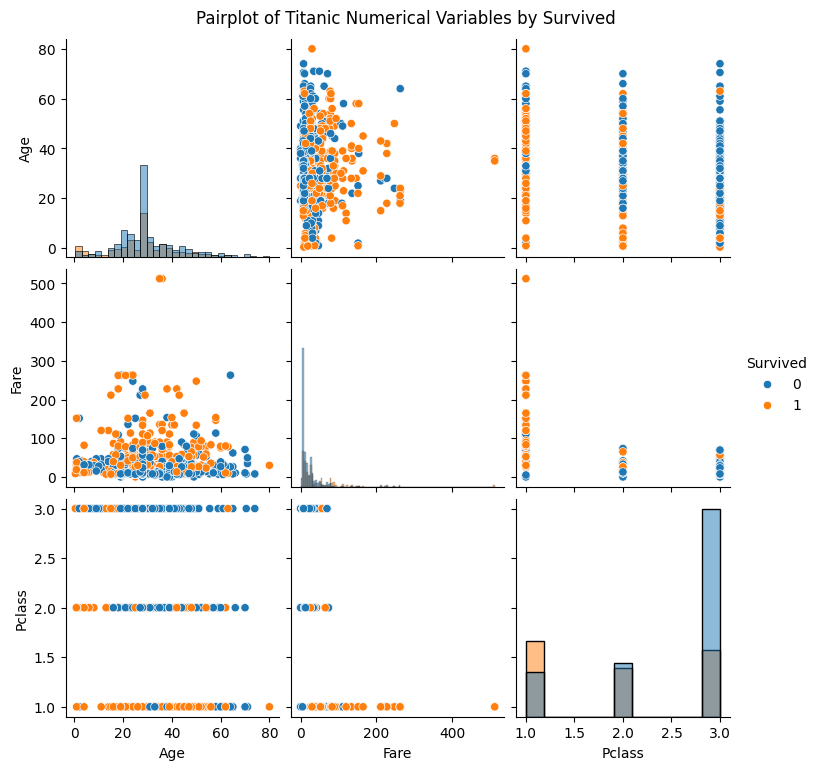

C:\Users\Dell\AppData\Local\Temp\ipykernel_12928\3370549021.py:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=df, ci=None)


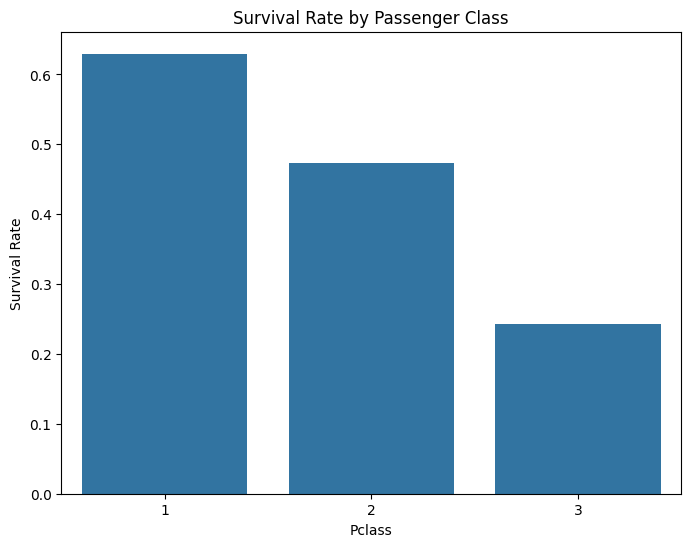

C:\Users\Dell\AppData\Local\Temp\ipykernel_12928\3370549021.py:28: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=df, ci=None)


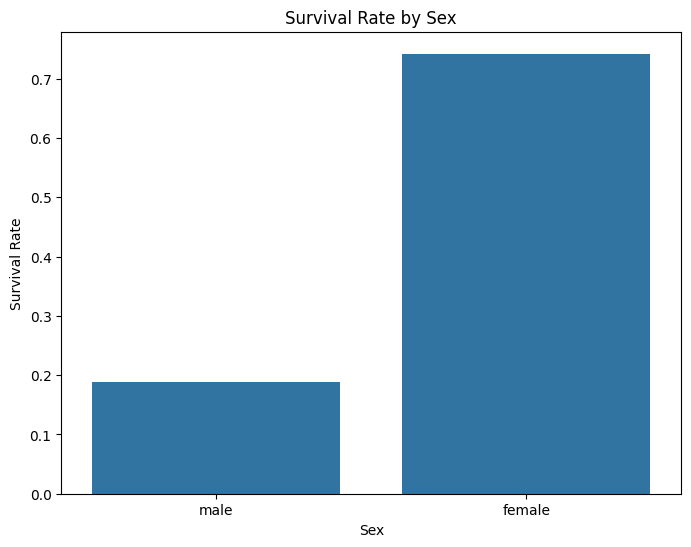

C:\Users\Dell\AppData\Local\Temp\ipykernel_12928\3370549021.py:36: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Embarked', y='Survived', data=df, ci=None)


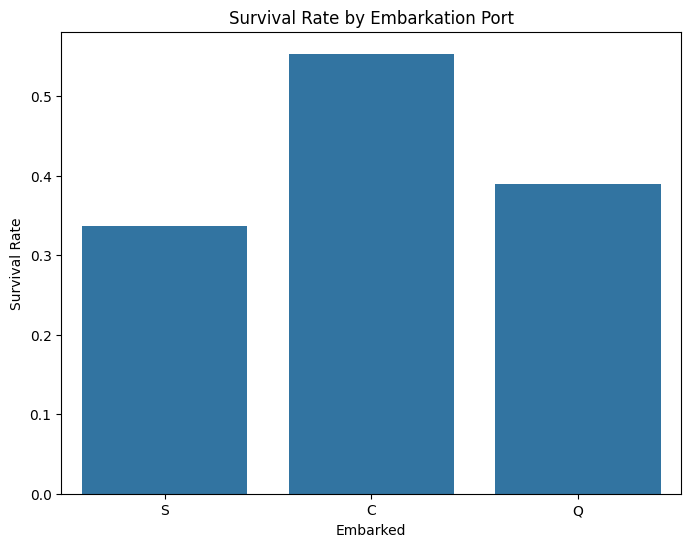

In [32]:
# Derive Deck from Cabin
df['Deck'] = df['Cabin'].str[0].fillna('Unknown')  # Extract first letter or 'Unknown'
# 1. Correlation Heatmap for Numerical Variables
plt.figure(figsize=(8, 6))
corr = df[['Age', 'Fare', 'Pclass', 'SibSp', 'Parch']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Titanic Numerical Variables')
plt.savefig('titanic_correlation_heatmap.png')
plt.show()

#  Pairplot for Numerical Variables, Colored by Survived
sns.pairplot(df, vars=['Age', 'Fare', 'Pclass'], hue='Survived', diag_kind='hist')
plt.suptitle('Pairplot of Titanic Numerical Variables by Survived', y=1.02)
plt.savefig('titanic_pairplot.png')
plt.show()

#  Bar Plots for Categorical Relationships
# Survival by Pclass
plt.figure(figsize=(8, 6))
sns.barplot(x='Pclass', y='Survived', data=df, ci=None)
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival Rate')
plt.savefig('titanic_survival_by_pclass.png')
plt.show()

# Survival by Sex
plt.figure(figsize=(8, 6))
sns.barplot(x='Sex', y='Survived', data=df, ci=None)
plt.title('Survival Rate by Sex')
plt.ylabel('Survival Rate')
plt.savefig('titanic_survival_by_sex.png')
plt.show()

# Survival by Embarked
plt.figure(figsize=(8, 6))
sns.barplot(x='Embarked', y='Survived', data=df, ci=None)
plt.title('Survival Rate by Embarkation Port')
plt.ylabel('Survival Rate')
plt.savefig('titanic_survival_by_embarked.png')
plt.show()


In [33]:
# Summary Statistics
print("Summary Statistics for Numerical Variables:")
print(df[['Age', 'Fare', 'Pclass', 'SibSp', 'Parch']].describe())
print("\nSurvival Rates by Pclass:")
print(df.groupby('Pclass')['Survived'].mean())
print("\nSurvival Rates by Sex:")
print(df.groupby('Sex')['Survived'].mean())
print("\nSurvival Rates by Embarked:")
print(df.groupby('Embarked')['Survived'].mean())
print("\nSurvival Rates by Deck:")
print(df.groupby('Deck')['Survived'].mean())

Summary Statistics for Numerical Variables:
              Age        Fare      Pclass       SibSp       Parch
count  891.000000  891.000000  891.000000  891.000000  891.000000
mean    29.361582   32.204208    2.308642    0.523008    0.381594
std     13.019697   49.693429    0.836071    1.102743    0.806057
min      0.420000    0.000000    1.000000    0.000000    0.000000
25%     22.000000    7.910400    2.000000    0.000000    0.000000
50%     28.000000   14.454200    3.000000    0.000000    0.000000
75%     35.000000   31.000000    3.000000    1.000000    0.000000
max     80.000000  512.329200    3.000000    8.000000    6.000000

Survival Rates by Pclass:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

Survival Rates by Sex:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

Survival Rates by Embarked:
Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

Survival Rates by Deck:
Deck
A    0.466667
B  